<font size = 5>ЦЕЛЬ:
<font size = 3>Исследовать поведение пользователей в обновлённом приложении.

<font size = 5>ЗАДАЧИ:
<font size = 3>В рамках проверки гипотез вам необходимо решить три задачи:

 
- Определить, насколько обучение сокращает время прохождения этапов игры.
- Доказать, что успешное обучение само по себе влияет на оплату и не имеет значения то, каким этапом оно шло.
- Определить, насколько прозрачен процесс взаимодействия с игрой.

<font size = 5>КОНКРЕТНЫЕ ШАГИ (ФОРМАЛИЗОВАННЫЕ ЗАДАЧИ):

<font size = 3>

1. Сравнить время прохождения различных этапов для пользователей, которые завершили обучение, и пользователей, не начинавших обучение. Если показатель отличается, выяснить, насколько. 
2. Проверить, существует ли зависимость между вероятностью оплаты вопросов и количеством обучений, которые начинал или завершал пользователь. 

3. Выяснить, как часто пользователи начинают обучение после выбора уровня сложности. (Это позволит оценить прозрачность процесса взаимодействия с игрой: если пользователи после выбора уровня сложности обращаются к обучению, значит, работа с приложением непонятна.)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#считываем базовые файлы
df = pd.read_csv('7_4_Events.csv', sep=',')
df2 = pd.read_csv('purchase.csv', sep=',')


#оставляем лишь тех пользователей, кто регистрировался в 2018 году
cond = (df.start_time>='2018-01-01') & (df.start_time<'2019-01-01') & (df.event_type=='registration')
registered = df[cond]['user_id'].to_list()
events = df[df.user_id.isin(registered)]

#преобразуем формат дат
events.start_time = pd.to_datetime(events.start_time, format='%Y-%m-%dT%H:%M:%S')
df2['event_datetime'] = pd.to_datetime(df2['event_datetime'])

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


<font size = 5>Первая задача: 
<font size = 3>Необходимо сравнить время прохождения различных этапов для пользователей, которые завершили обучение, и пользователей, не начинавших обучение. Если показатель отличается, выяснить, насколько.


In [ ]:
# Формируем группу пользователей, прошедших обучение 
finished_tutorial_users = events[events['event_type'] == 'tutorial_finish']['user_id'].unique()
# Создаем группу пользователей, не начинавших обучение
all_users = set(events['user_id'])
tutorial_start_users = set(events[(events['event_type'] == 'tutorial_start')]['user_id'])
without_tutorial_users = all_users.difference(tutorial_start_users)

# Выделяем df с типом события registration, отбираем пользователей, которые прошли обучение.
finished_tutorial = events[events['user_id'].isin(finished_tutorial_users)]
registration = finished_tutorial[finished_tutorial['event_type'] == 'registration']
# Для удобства оставляем необходимые столбцы и переименовываем столбец с временем 
registration = registration[['user_id', 'start_time']].rename(columns={'start_time':'registration_time'})

# То же самое проделываем с событием purchase.

purchase_choice = df2[['user_id', 'event_datetime']].rename(columns={'event_datetime':'purchase_time'})
# Объединяем две получившиеся таблицы. Создаем столбец timedelta. И вычисляем разницу во времени между событиями. 
merged = registration.merge(purchase_choice, on= 'user_id', how= 'inner')
merged['timedelta'] = (merged['purchase_time'] - merged['registration_time'])
print(merged['timedelta'].describe())

#тоже самое делаем с пользователями, которые не начинали обучение
without_tutorial = events[events['user_id'].isin(without_tutorial_users)]
registration_1 = without_tutorial[without_tutorial['event_type'] == 'registration']
registration_1 = registration_1[['user_id', 'start_time']].rename(columns={'start_time':'registration_time'})


purchase_choice_1 = df2[['user_id', 'event_datetime']].rename(columns={'event_datetime':'purchase_time'})

merged_2 = registration_1.merge(purchase_choice_1, on= 'user_id', how= 'inner')
merged_2['timedelta'] = (merged_2['purchase_time'] - merged_2['registration_time'])
print(merged_2['timedelta'].describe())


count                         1447
mean     4 days 00:30:03.247408431
std      2 days 04:47:29.946150698
min                0 days 04:36:58
25%                2 days 04:09:55
50%                3 days 19:04:59
75%                5 days 15:46:14
max               11 days 00:35:04
Name: timedelta, dtype: object
count                           22
mean     4 days 09:06:01.909090909
std      2 days 05:12:16.748091626
min                0 days 09:59:07
25%                2 days 21:31:31
50%                4 days 11:29:09
75%         6 days 02:28:47.750000
max                7 days 16:46:20
Name: timedelta, dtype: object


In [ ]:
time_with_tutorial = merged.copy()
time_with_tutorial['timedelta'] = time_with_tutorial['timedelta']/pd.Timedelta('1 hour')
time_without_tutorial = merged_2.copy()
time_without_tutorial['timedelta'] = time_without_tutorial['timedelta']/pd.Timedelta('1 hour')
print('Cреднее время между регистрацией и оплатой пользователеми, которые завершили обучение:',round(time_with_tutorial['timedelta'].mean(),2)) 
print('Cреднее время между регистрацией и оплатой пользователем, которые даже не начинали обучение:',round(time_without_tutorial['timedelta'].mean(),2)) 
a = time_with_tutorial['timedelta'].mean()
b = time_without_tutorial['timedelta'].mean()
c = [a,b]
d = ['Пользователи, которые завершили обучение', 'Пользователи, которые даже не начинали обучение']
timedelta_mean = time_without_tutorial['timedelta'].mean() - time_with_tutorial['timedelta'].mean()
print('Разница между средним временем:',round(timedelta_mean,2)) #разница 


Cреднее время между регистрацией и оплатой пользователеми, которые завершили обучение: 96.5
Cреднее время между регистрацией и оплатой пользователем, которые даже не начинали обучение: 105.1
Разница между средним временем: 8.6


Text(0.5, 1.0, 'Среднее время прохождения между регистрацией и оплатой группой пользователей')

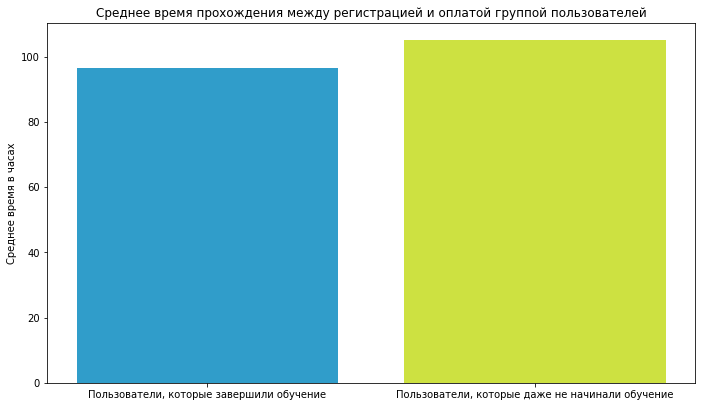

In [ ]:

#визуализация главного графика
fig = plt.figure(figsize=(9,5))
ax = fig.add_axes([0, 0, 1, 1])
color_rectangle = np.random.rand(7, 3)
ax.bar(d,c, color = color_rectangle)
ax.set_ylabel('Среднее время в часах')
ax.set_title('Среднее время прохождения между регистрацией и оплатой группой пользователей')


<font size = 5>Вывод по первой задаче: 

<font size = 3>Мы видим, что среднее время между регистрацией и оплатой пользователями, которые не начинали обучение, на 8.5 часов больше у пользователей, которые завершили обучение. Из этого следует вывод, что обучение влияет на время прохождения различных этапов пользователей.

<font size = 5>Вторая задача: 
<font size = 3>Проверить, существует ли зависимость между вероятностью оплаты вопросов и количеством обучений, которые начинал или завершал пользователь. 

In [ ]:
#копируем таблицу для удобства работы
events_2 = events.copy()
#считаем юзеров, начинавшие обучение
group_by_count_tutorial_start = events_2[events_2['event_type'] == 'tutorial_start']
#считаем сколько попыток начать обучение совершил пользователь
users_in_group = group_by_count_tutorial_start.groupby('user_id').count()
#группируем пользователей по кол-ву обучений
users_in_group = users_in_group.groupby('tutorial_id').count()
#убираем лишние столбцы и переименовываем
users_in_group = users_in_group[['start_time']].rename(columns={'start_time':'count_start_tutorial'})
#добавляем столбец индекса, чтобы удобнее было объединять таблицы
users_in_group.reset_index(level=0, inplace=True) 
#переименовываем столбец, где хранятся группы по кол-ву обучений
users_in_group = users_in_group.rename(columns={'tutorial_id':'group_by_tutorial'})
#объединяем таблицы, чтобы посмотреть оплаты по пользователям, которые проходили обучение
merge_purchase = df2.merge(group_by_count_tutorial_start, on='user_id', how='left')
#считаем сколько попыток начать обучение совершил оплативший пользователь
merge_purchase = merge_purchase.groupby('user_id').count()
#группируем оплативших пользователей по кол-ву обучений
merge_purchase = merge_purchase.groupby('event_type').count()
#убираем лишние столбцы и переименовываем
merge_purchase= merge_purchase[['selected_level']].rename(columns={'selected_level':'count_purchase'})
#добавляем столбец индекса, чтобы удобнее было объединять таблицы
merge_purchase.reset_index(level=0, inplace=True) 
#переименовываем столбец, где хранятся группы по кол-ву обучений
merge_purchase = merge_purchase.rename(columns={'event_type':'group_by_tutorial'})
#объединяем датафреймы, чтобы посчитать проценты
merge_total = users_in_group.merge(merge_purchase, on='group_by_tutorial', how='left')
#считаем процент оплативших по кол-ву обучений
merge_total['percent_purchase'] = (merge_total['count_purchase'] / merge_total['count_start_tutorial'] * 100).round(2)
display(merge_total)


,group_by_tutorial,count_start_tutorial,count_purchase,percent_purchase
0,1,9103,1207,13.26
1,2,1589,218,13.72
2,3,427,51,11.94
3,4,221,30,13.57
4,5,109,16,14.68
5,6,116,14,12.07
6,7,94,12,12.77
7,8,86,13,15.12
8,9,113,17,15.04


На основании этих данных строим график:

Text(0.5, 1.0, 'График зависимости между вероятностью оплаты и количеством обучений')

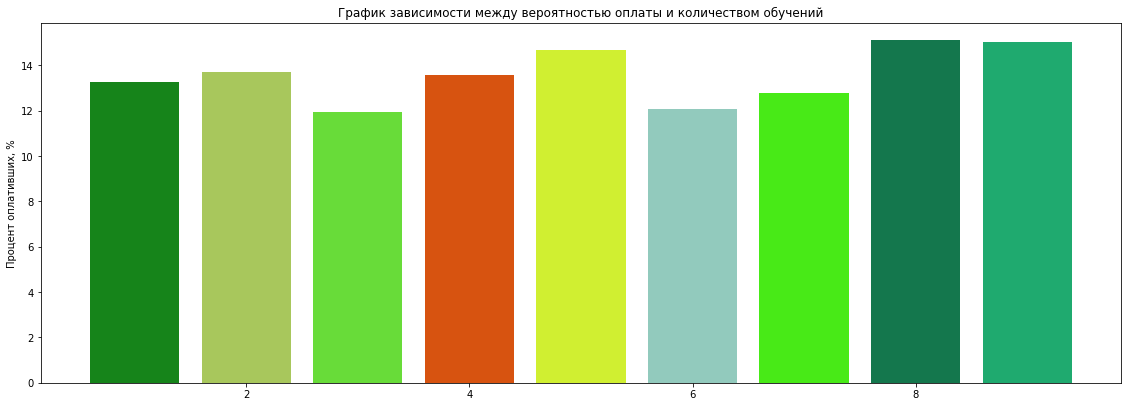

In [ ]:
fig_2 = plt.figure(figsize=(15,5))
ax_2 = fig_2.add_axes([0, 0, 1, 1])
color_rectangle = np.random.rand(10, 3)
ax_2.bar(merge_total['group_by_tutorial'],merge_total['percent_purchase'], color = color_rectangle)
ax_2.set_ylabel('Процент оплативших, %')
ax_2.set_title('График зависимости между вероятностью оплаты и количеством обучений')

<font size = 5>Вывод по второй задаче: 

<font size = 3>Мы видим, что процент оплативших пользователей в зависимости от кол-ва обучений не сильно отличается, следовательно, можно сделать вывод, что никакой зависимости между вероятностью оплаты и количеством обучений нет.

<font size = 5>Третья задача: 
<font size = 3>Выяснить, как часто пользователи начинают обучение после выбора уровня сложности. (Это позволит оценить прозрачность процесса взаимодействия с игрой: если пользователи после выбора уровня сложности обращаются к обучению, значит, работа с приложением непонятна.)

In [ ]:
#отделяем пользователей, которые выбирали уровень сложности
level_choice = events_2[events_2['event_type'] == 'level_choice']
#посчитаем пользователей, выбравших уровень сложности
ev_count = events_2[events_2['event_type'] == 'level_choice']['user_id'].nunique()
print('Количество пользователей, выбравших уровень сложности:',ev_count)
#оставляем нужные столбцы и переименовываем их
level_choice = level_choice[['start_time','user_id']].rename(columns={'start_time':'level_time_choice'})
#отделяем пользователей, начинавшие обучение
tutorial_start = events_2[events_2['event_type'] == 'tutorial_start']
#оставляем нужные столбцы и переименовываем их
tutorial_start = tutorial_start[['start_time','user_id']].rename(columns={'start_time':'start_tutorial_time'})
#объединяем датафреймы
merge_total_2 = level_choice.merge(tutorial_start, on='user_id', how='left')
#считаем разницу во времени между началом обучения и выбором уровня сложности
merge_total_2['delta'] = (merge_total_2['start_tutorial_time'] - merge_total_2['level_time_choice'])/pd.Timedelta('1 hour')
#посчитаем пользователей, которые начали обучение после выбора уровня сложности
merge_total_2 = merge_total_2[merge_total_2['delta'] > 0]['user_id'].nunique()
print('Количество пользователей, которые начали обучение после выбора уровня сложности:',merge_total_2)
print('Доля пользователей, которые обратились к обучению после выбора уровня:',round(merge_total_2/ev_count*100,2),'%')

Количество пользователей, выбравших уровень сложности: 8342
Количество пользователей, которые начали обучение после выбора уровня сложности: 1386
Доля пользователей, которые обратились к обучению после выбора уровня: 16.61 %


<font size = 5>Вывод по третьей задаче: 

<font size = 3>Мы видим, что доля пользователей, которые обратились к обучению после выбора уровня составляет меньше 17%. Из этого можно сделать вывод, что у большинства пользователей, выбравших уровень сложности, не возникает никаких непонятных моментов.